In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split


df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR483LxN6nS8JyeMT2xjILQK09-5pW0fyjrsvTJ5axj66i37k6bmBRHgu8ASD9uFbV9ycJKUQLEpLvm/pub?output=csv', low_memory= False)[1:]
#print out a description of the dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [18]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,613.000000,613.000000,592.000000,599.000000,563.000000
mean,5402.732463,1623.890571,146.412162,341.969950,0.841918
std,6114.004114,2927.903583,85.587325,65.170672,0.365142
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,128.000000,360.000000,1.000000
75%,5780.000000,2302.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [19]:
# Data preprocessing and null values imputation
# Label editing
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df['Married']=df['Married'].map({'Yes':1,'No':0})
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})
df['Dependents'].replace('3+',3,inplace=True)
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})
df['Property_Area']=df['Property_Area'].map({'Semiurban':1,'Urban':2,'Rural':3})
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})

#Null value Imputation
rev_null=['Gender','Married','Dependents','Self_Employed','Credit_History','LoanAmount','Loan_Amount_Term']
df[rev_null]=df[rev_null].replace({np.nan:df['Gender'].mode(),
                                   np.nan:df['Married'].mode(),
                                   np.nan:df['Dependents'].mode(),
                                   np.nan:df['Self_Employed'].mode(),
                                   np.nan:df['Credit_History'].mode(),
                                   np.nan:df['LoanAmount'].mean(),
                                   np.nan:df['Loan_Amount_Term'].mean()
                                   })

In [20]:
##Alternatively you may use the MultiColumnLabelEncoder library to encode categorical columns:
#!pip install MultiColumnLabelEncoder
#from MultiColumnLabelEncoder import MultiColumnLabelEncoder
#df_cat = df.select_dtypes(include=['object']).copy()
#print(df_cat)
#categorical_cols = df_cat.columns
#encoded_df = MultiColumnLabelEncoder(columns = categorical_cols).fit_transform(df)



In [21]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,3,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1.0,1.0,2,1,1.0,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,3,1
610,LP002979,1.0,1.0,3,1,0.0,4106,0.0,40.0,180.0,1.0,3,1
611,LP002983,1.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,2,1


One would think, _Should we normalise our data here?_

- “Normalization should have no impact on the performance of a decision tree. It is generally useful, when you are solving a system of equations, least squares, etc, where you can have serious issues due to rounding errors. In decision tree, you are just comparing stuff and branching down the tree, so normalization would not help”
- Ref: https://math.stackexchange.com/questions/927190/normalization-of-data-in-decision-tree#:~:text=Normalization%20should%20have%20no%20impact,issues%20due%20to%20rounding%20errors.

##Creating Training and Testing Sets##

Lets split our data into 80:20 (Training:Testing) ratio and set random_state is to 1. This will ensure that if we rerun our model, it will provide us with the same results.

In [24]:
X=df.drop(columns=['Loan_ID','Loan_Status']).values
Y=df['Loan_Status'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [25]:
print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of Y_train=>',Y_train.shape)
print('Shape of Y_test=>',Y_test.shape)

Shape of X_train=> (490, 11)
Shape of X_test=> (123, 11)
Shape of Y_train=> (490,)
Shape of Y_test=> (123,)


##Building and Evaluating the Model##

Lets now build our model using the Entropy Metric. Let’s remember that we have 2 types of attribute selection measures:
1. Information Gain for Categorical variables
2. Gini Index for Continuous variables

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt.fit(X_train, Y_train)
dt_pred_train = dt.predict(X_train)

As a Decision Tree is a White Box model, we can interpret and visualise our model using graphviz as below:

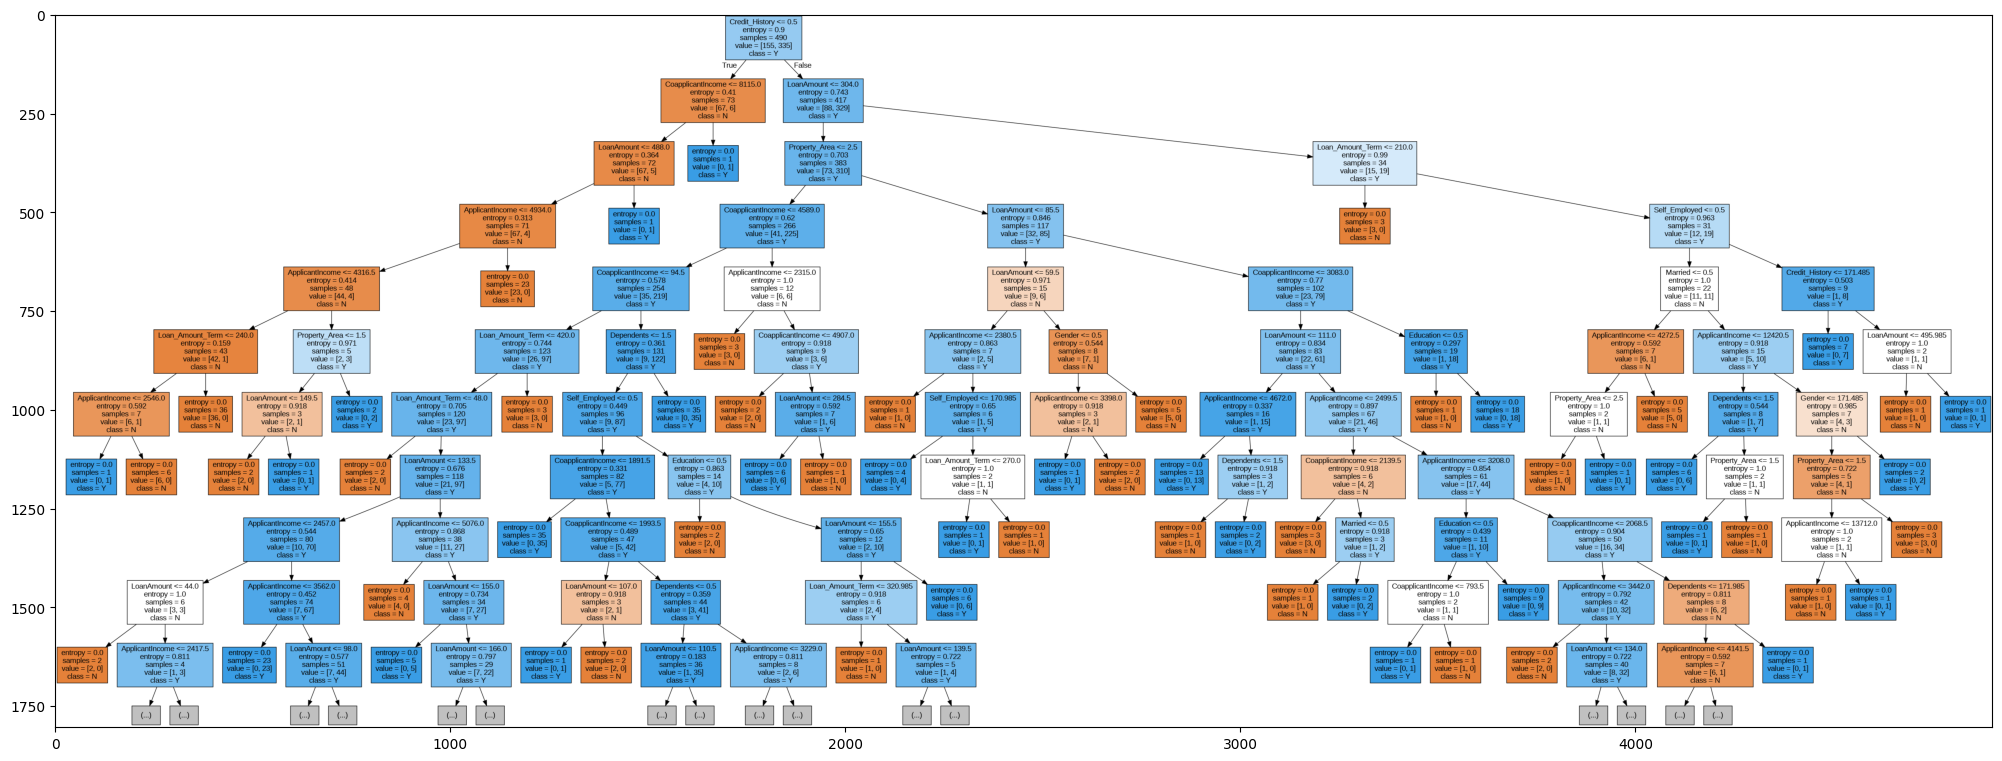

In [28]:
from sklearn import tree
#Visualising the decision tree
header_cols = df.drop(columns=['Loan_ID','Loan_Status']).columns
decision_tree = tree.export_graphviz(dt, out_file='tree.dot', feature_names=header_cols, class_names = ['N','Y'],filled=True,max_depth=10)

#converting the dot image to png format:
!dot -Tpng tree.dot -o tree.png

#plotting the decision tree
image = plt.imread('tree.png')
plt.figure(figsize=(25,25))
plt.imshow(image)


Lets change our max_depth to 2 so that we can visualise our tree better
This should create a graph as below:

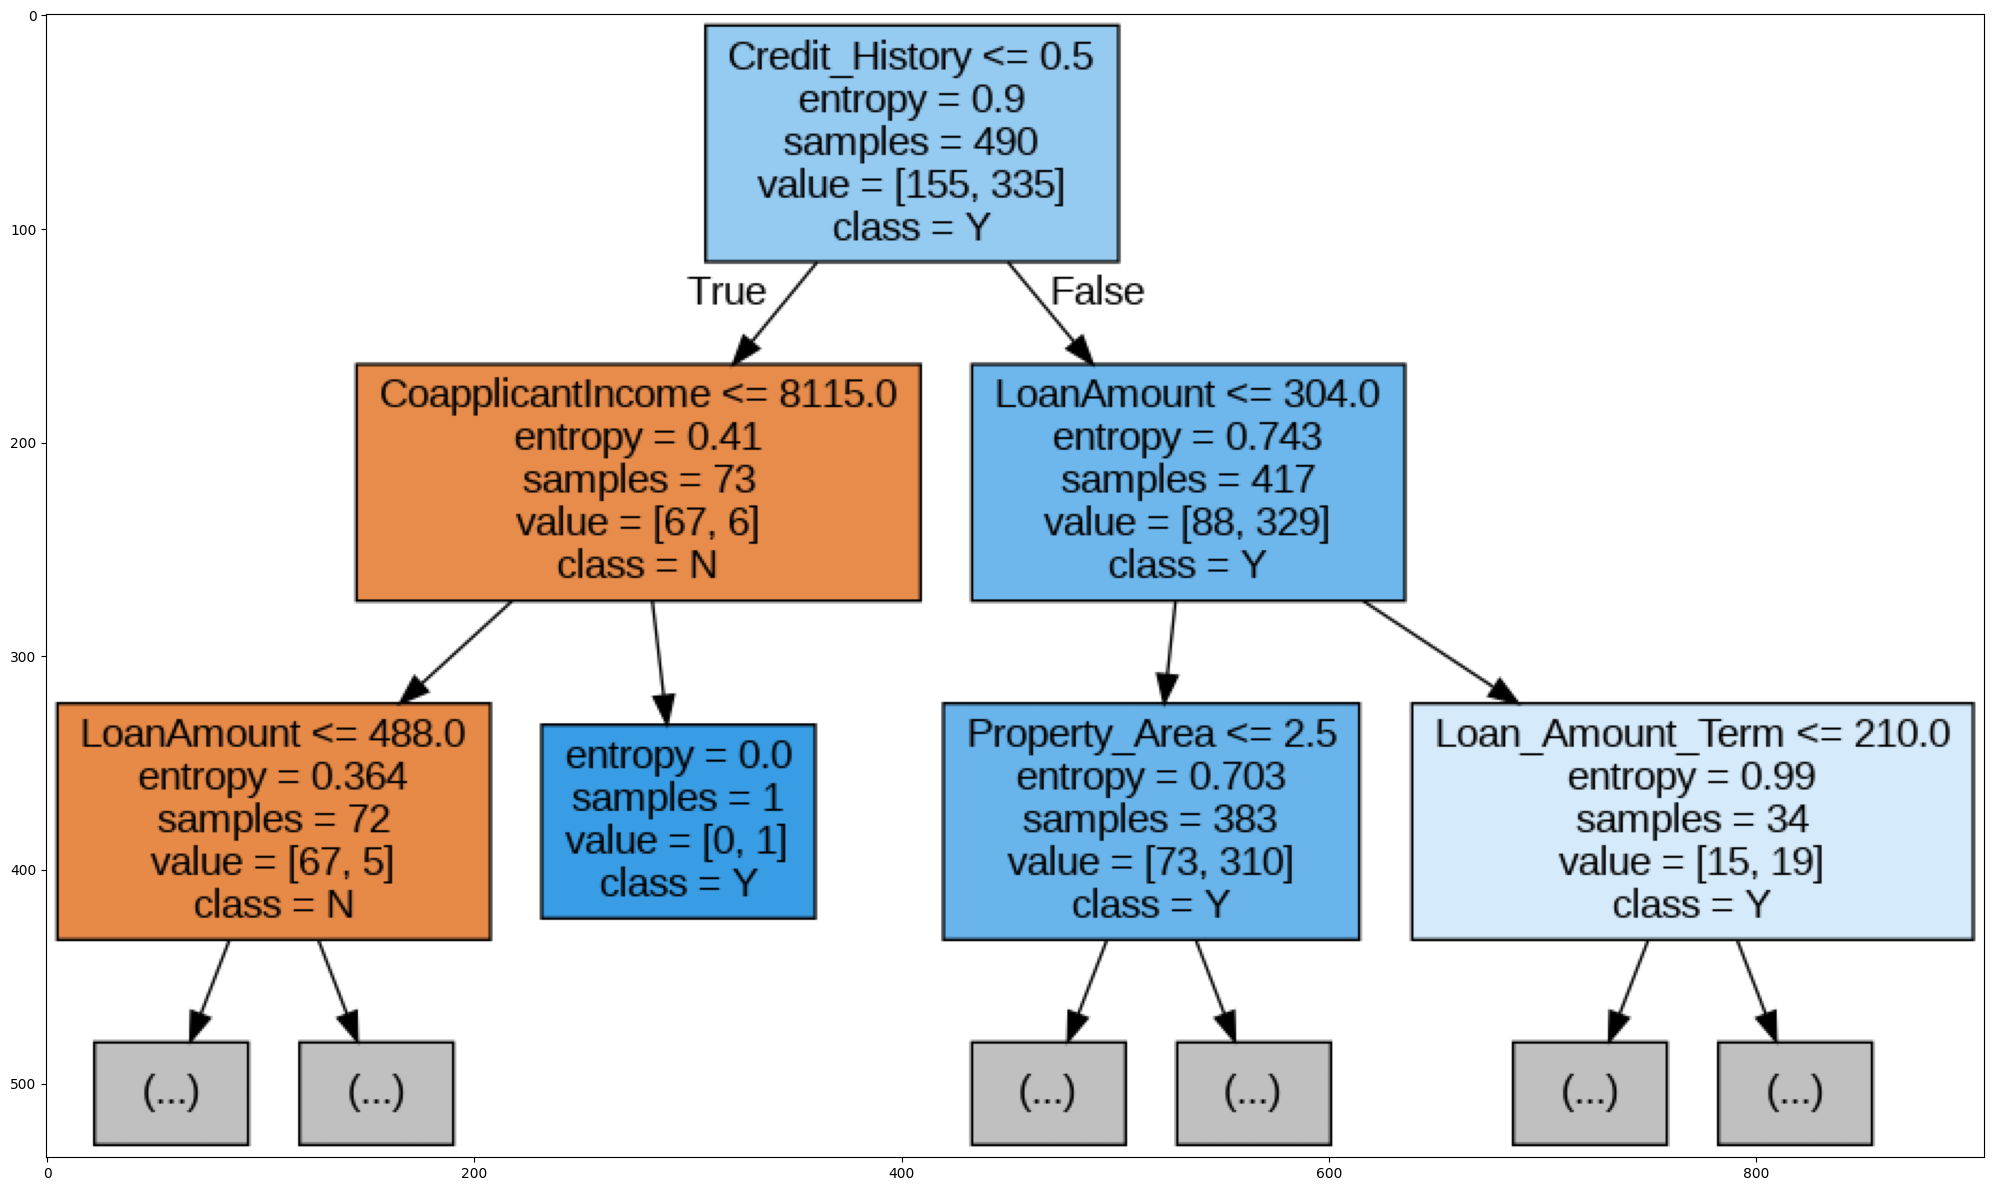

In [29]:
from sklearn import tree
#Visualising the decision tree
header_cols = df.drop(columns=['Loan_ID','Loan_Status']).columns
decision_tree = tree.export_graphviz(dt, out_file='tree.dot', feature_names=header_cols, class_names = ['N','Y'],filled=True,max_depth=2)  #filled=true colours in the fields

#converting the dot image to png format:
!dot -Tpng tree.dot -o tree.png

#plotting the decision tree
image = plt.imread('tree.png')
plt.figure(figsize=(25,25))
plt.imshow(image)

Let’s interpret the graphical model.

At Depth 0:
- The first question that the Decision Tree asks is: Is Credit_History <= 0.5? Based on the result, it follows either the True or the False node.
- The Entropy score at Depth 0 is 0.885. Lets recall that the Entropy is a metric of impurity in a given attribute. It is a metric which calculates randomness in data. An Entropy score greater than 0 implies that our samples contained with that node belong to different classes. An Entropy of 0 means that we have a pure note, which means that the node has only a single class of data.
- Value[149, 342] tells us how many samples at the given node fall into each category. First element in array shows us the number of samples that belong to “N” loan class and the 342 represent the “Y” class.
- Class = Y shows the prediction a given node will make. This is derived from the biggest number in the array. The class which occurs the most within the node will be selected as the class value. This means that the root node will predict that 491 samples all below to the ‘Y’ class. Of course this makes no sense, so that is why we continue to create further child nodes until Entropy = 0. When Entropy = 0, a leaf node is created as all the samples should fall within same class in that node.

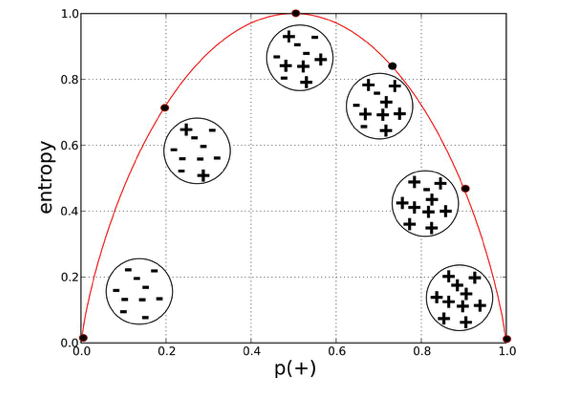

As you can see in the chart above, an Entropy of 1 shows that we have 50% probability from each class. Therefore we have 0 Information Gain. Lets recall that Information gain is the decrease in Entropy. As the Entropy tends towards 0, we are leaning towards a specific class. When Entropy is 0, all samples fall within the same class.

We can now evaluate our model using the F1 Score:

$$F1 Score = (2*Precision*Recall)
/
(Precision+Recall)$$


In [31]:
#Evaluation on Training Set
dt_pred_train = dt.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,dt_pred_train))

Training Set Evaluation F1-Score=> 1.0


In [35]:
dt_pred_test = dt.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,dt_pred_test))

Testing Set Evaluation F1-Score=> 0.7664670658682634


Decision Tree parameters that we can use to fine tune our Decision Tree further:
- Splitter
- Max_depth
- Min_samples_split
- Min_samples_leaf
- Max_features
- Ref: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
Decision Tree methods that can be called:

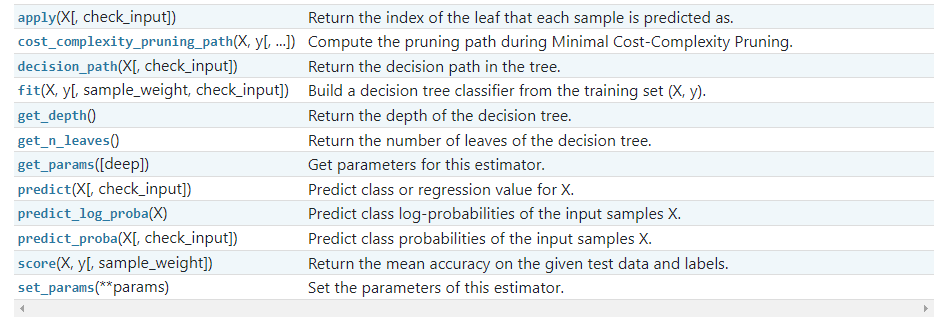

##Building a Random Forest##

In [37]:
# Building Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', random_state=42)
rfc.fit(X_train, Y_train)

#Evaluating on Training Set
rfc_pred_train = rfc.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,rfc_pred_train))


Training Set Evaluation F1-Score=> 1.0


In [38]:
#Evaluating on Test set
rfc_pred_test = rfc.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,rfc_pred_test))

Testing Set Evaluation F1-Score=> 0.8691099476439791


##Discuss Results##
Why do we think that the Random Forest Model Outperformed the Decision Tree?
Lets judge our feature importance per algorithm:

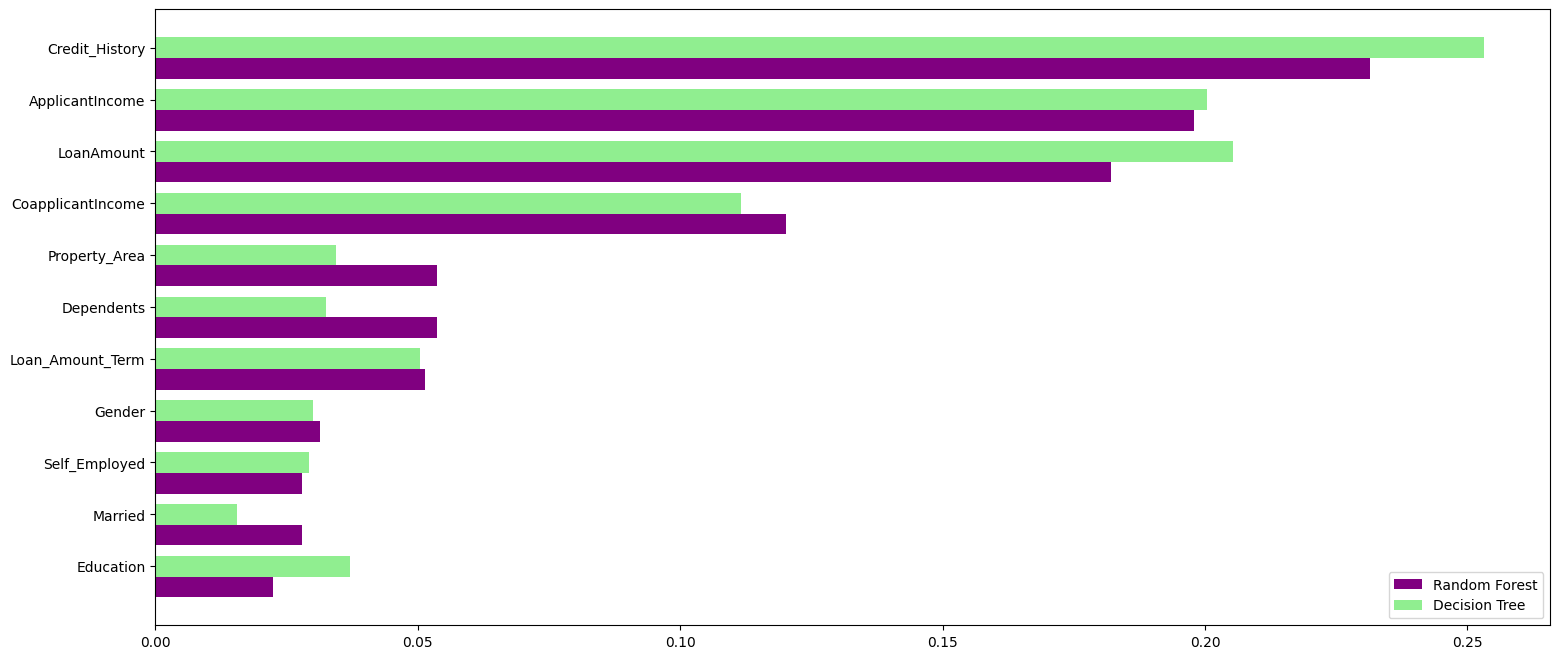

In [39]:
feature_importance=pd.DataFrame({
    'rfc':rfc.feature_importances_,
    'dt':dt.feature_importances_
},index=df.drop(columns=['Loan_ID','Loan_Status']).columns)
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='lightgreen',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()

As we can see, the Decision Tree is depending heavily on a particular set of features, Credit_History and ApplicantIncome. However, the RandomForest is decreasing their importance, and giving a more balanced weighting throughout. This is a special characteristic of random forest, which is the bagging of trees.

What is Bagging in Machine Learning?

Bagging is an ensemble algorithm that fits multiple models on different subsets of training dataset, then combines the predictions from all models.

Is Random Forest Bagging or Boosting?

Random Forest is a bagging technique and note a boosting technique. In boosting as the name suggests, one is learning from the other which in turn boosts the learning. The trees in random forests are run in parallel. There is no interaction between these trees whilst they are being built.

This means that the Random Forest algorithm can generalise more over the data. This feature makes the Random Forest more robust and accurate than the Decision

##Confusion Matrix##

Lets retrain again using our Decision Tree and plot the confusion matrices for the training and testing datasets.

In [40]:
# helper function
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=['N', 'Y']
               ,xticklabels=['N', 'Y'],cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 1.0
Train Confusion matrix


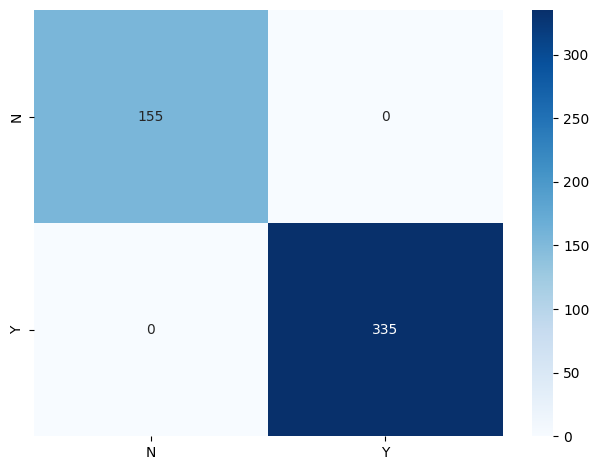

Test score 0.8691099476439791
Test Confusion matrix


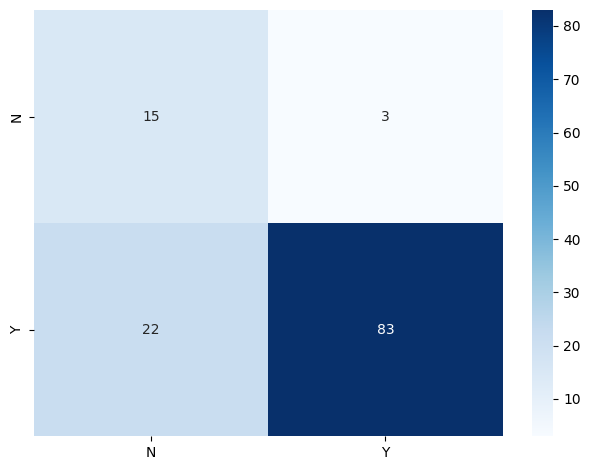

In [41]:
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt.fit(X_train, Y_train)
dt_pred_train = dt.predict(X_train)

print(f'Train score {f1_score(rfc_pred_train,Y_train)}')
plot_confusionmatrix(rfc_pred_train, Y_train, dom='Train')

print(f'Test score {f1_score(rfc_pred_test,Y_test)}')
plot_confusionmatrix(rfc_pred_test, Y_test, dom='Test')

As we noticed earlier, for both the Decision Tree and Random Forest, we are having a high training score, but then a much lower testing score. This is an overfitting case. In order to reduce the impact of overfitting we can consider pruning our trees

##Pruning the Decision Tree##

Pre Pruning is nothing more than stopping our decision trees from growing at an early stage. For that we can limit the growth of the trees by setting constraints. For example, we can limit parameters such as max_depth, min_samples etc…

One effective way on how we can optimise our parameters is by doing a grid search on these parameters and choose the optimum values that give the better performance on the test data

Lets start by checking on max_depth:

In [42]:
max_depth = dt.get_depth()
max_depth

18

In [43]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV

max_depth_grid_search = GridSearchCV(
    estimator = DecisionTreeClassifier(random_state=42),
    scoring=make_scorer(f1_score),
    param_grid=ParameterGrid(
      {"max_depth": [[max_depth] for max_depth in range(1, max_depth + 1)]}
    ),

)

max_depth_grid_search.fit(X_train, Y_train)
max_depth_grid_search.best_params_

{'max_depth': 1}

Lets consider the optimisation of the following parameters:
• max_depth: maximum depth of decision tree
• min_sample_split: The minimum number of samples required to split an internal node:
• min_samples_leaf: The minimum number of samples required to be at a leaf node

In [44]:
params = {'max_depth': [1,2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}


clf = DecisionTreeClassifier(criterion = 'entropy')
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

Max Depth in Best Tree: 1
Min Samples Leaf: 2
All Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training Set Evaluation F1-Score=> 0.875
Testing Set Evaluation F1-Score=> 0.8808290155440415
Train Confusion matrix


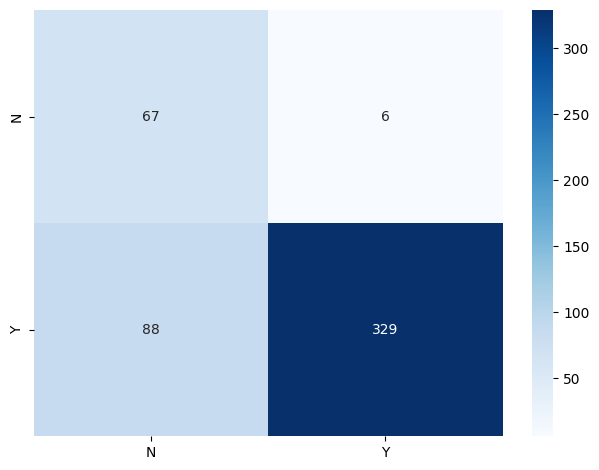

Test Confusion matrix


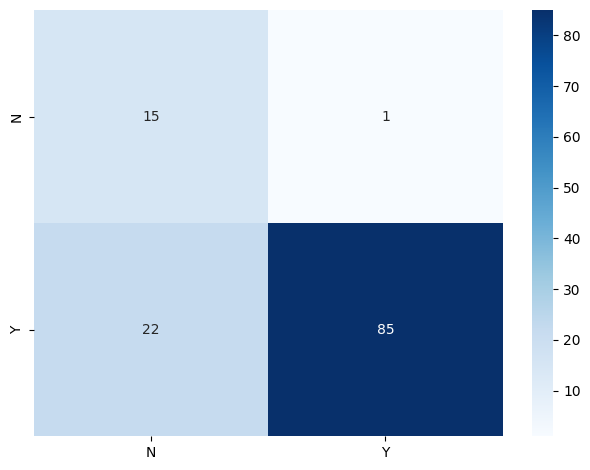

In [45]:
model = gcv.best_estimator_
model.fit(X_train,Y_train)
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Max Depth in Best Tree:", model.get_depth())
print("Min Samples Leaf:", model.get_n_leaves())
print("All Parameters:", model.get_params(deep=True))
print('Training Set Evaluation F1-Score=>',f1_score(Y_train, Y_train_pred))
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test, Y_test_pred))
plot_confusionmatrix(Y_train_pred,Y_train,dom='Train')
plot_confusionmatrix(Y_test_pred,Y_test,dom='Test')

As we have a small dataset, we don’t see a great improvement in our test result, however, we can clearly see that our training accuracy dropped to 88% and our Testing F1Score improved by 6% (from 79.5% to 85.8%). We can continue fine tuning on our parameters to optimise this further and avoid overfitting.
As with our previous Grid Search it is clear that the best Tree has a max depth of 1.


Lets plot the best tree via graphviz again:

1


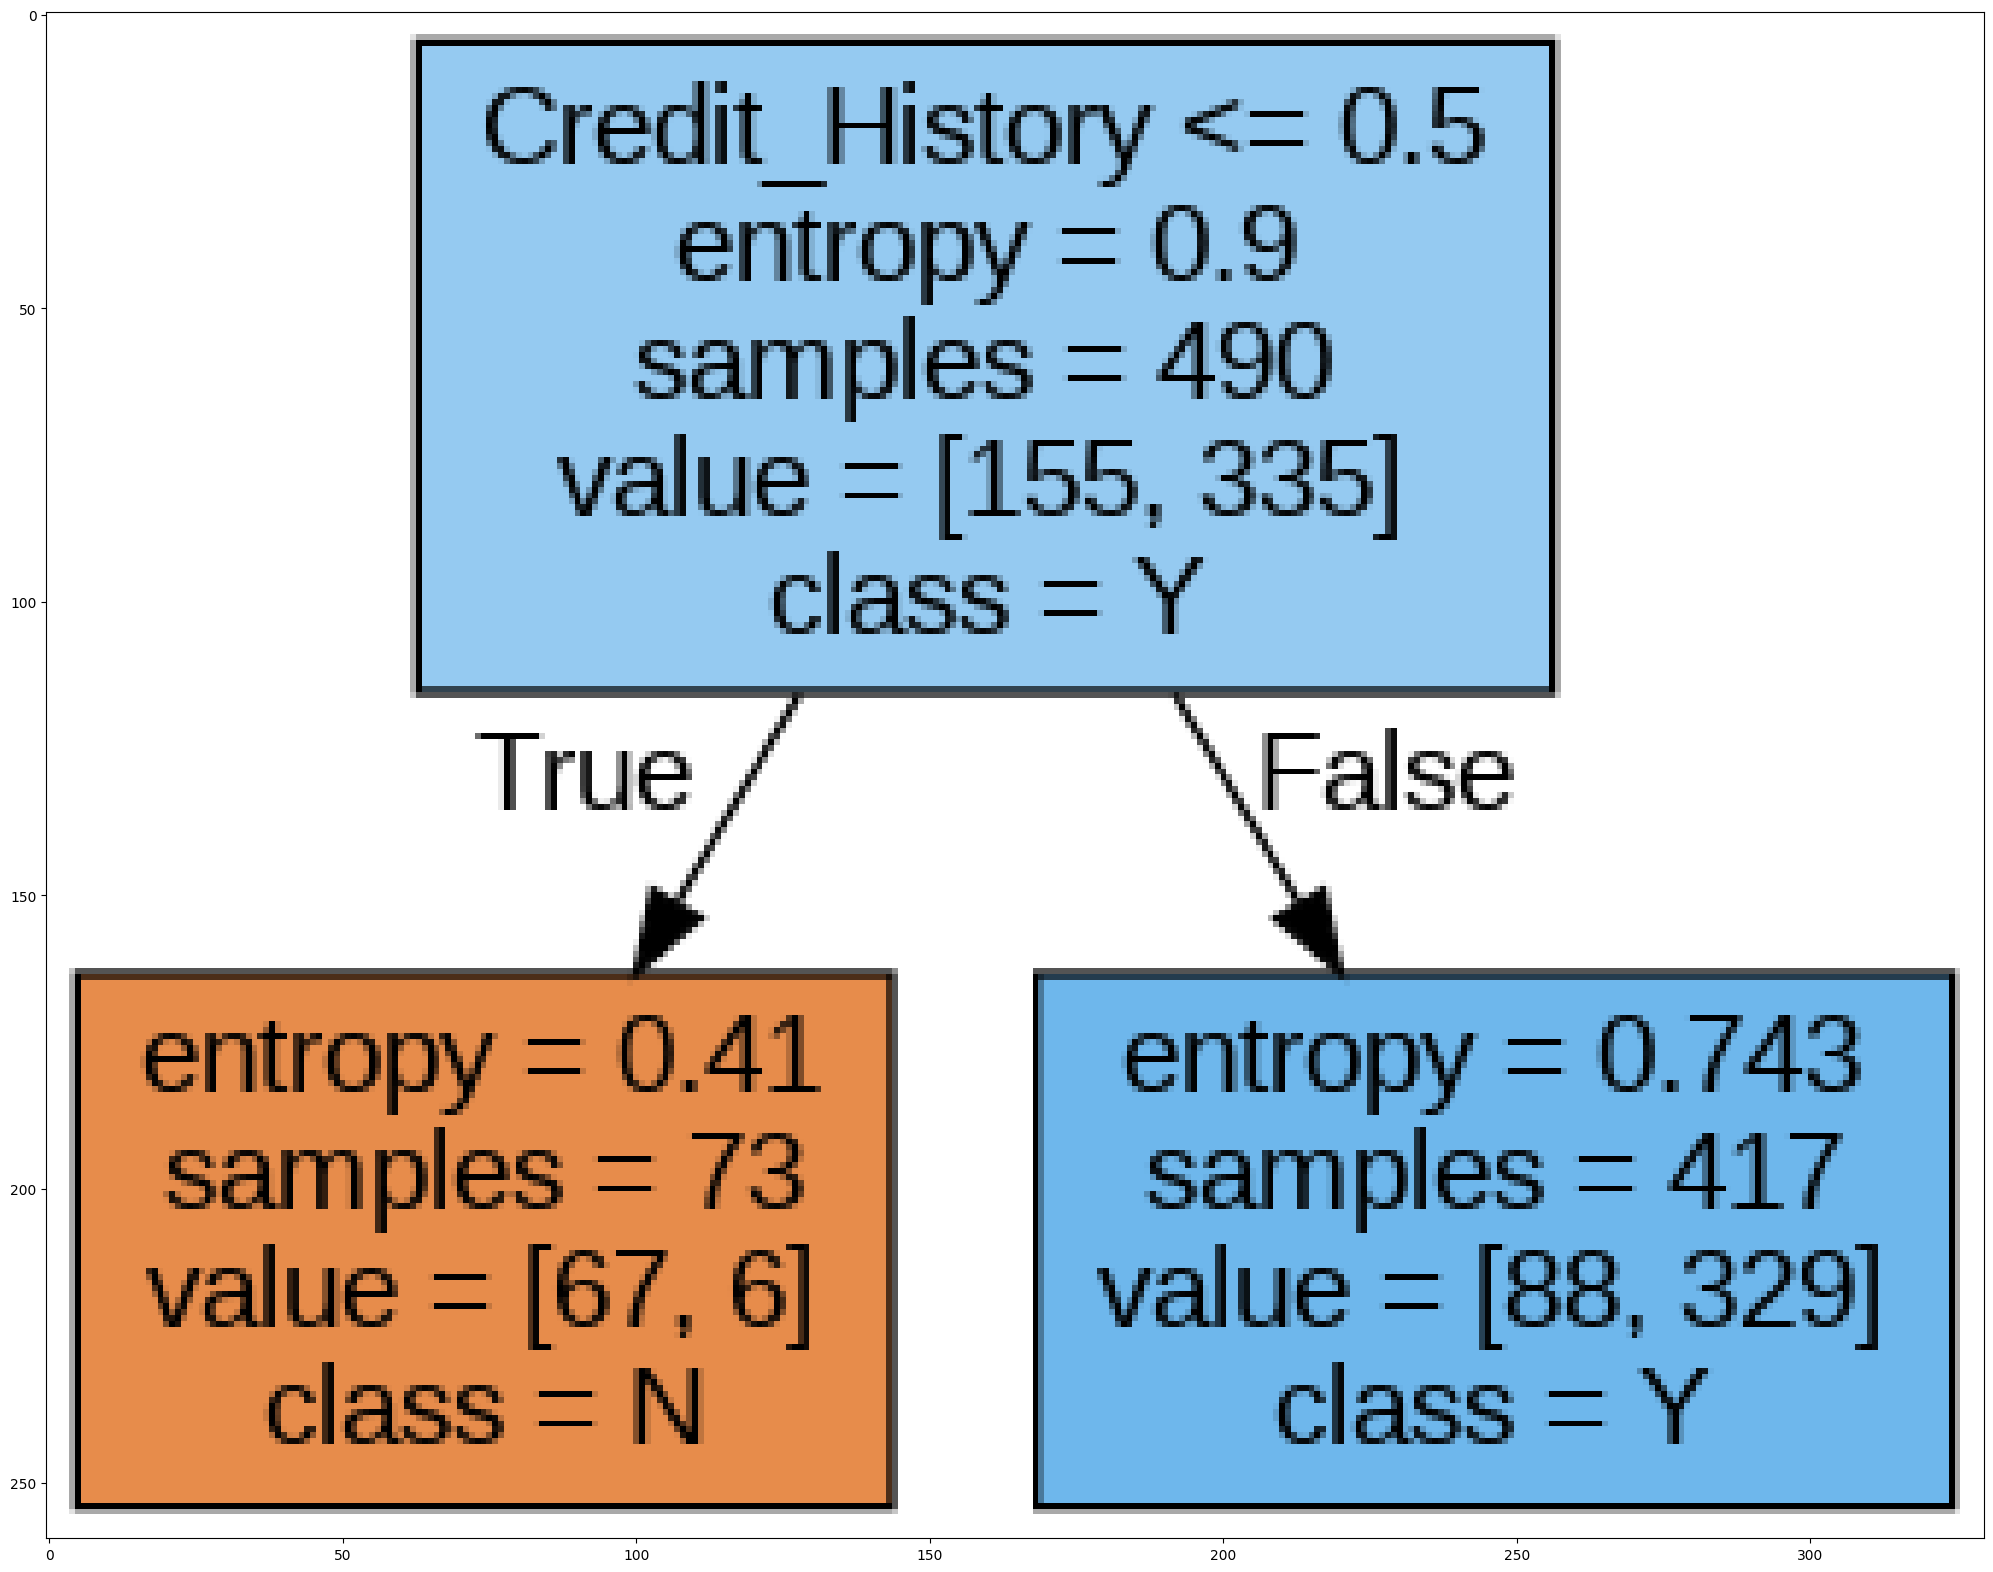

In [46]:
print(model.get_depth())

decision_tree = tree.export_graphviz(model, out_file='tree.dot', feature_names=header_cols, class_names = ['N', 'Y'], filled=True, max_depth=10)

# converting the dot image to png format
!dot -Tpng tree.dot -o tree.png

#plotting the decision tree
image = plt.imread('tree.png')
plt.figure(figsize=(25,25))
plt.imshow(image)

**Post-Pruning** is another way on how we can limit the growth of trees and avoid overfitting. We can do this by post pruning methods such as cost complexity pruning. This helps to improve test accuracy and get a better model. Cost complexity pruning is all about finding the right parameter for alpha.

Which subtree is selected eventually depends on α . If α=0, then the biggest tree will be chosen because the complexity penalty term is essentially dropped. As α approaches infinity, the tree of size 1, i.e., a single root node, will be selected. (https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107 ). This means that greater values of alpha increase the number of nodes pruned. Lets show the effect of this alpha whilst pruning trees and how we can choose the best alpha based on validation scores.

To understand which alpha should we use, scikit-learn provides the cost_complexity_pruning_path method, which returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process.

In [47]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Let’s now plot the effective alpha, versus the total impurity of leaves:

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

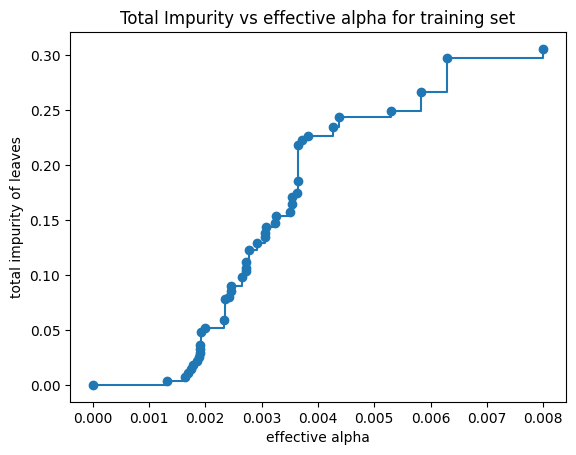

In [48]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

As we can notice in the chart, as alpha increases, more of the tree is pruned, which increases the total impurity of its leaves. As we can see, the highest alpha gives an impurity of 30%, which basically represents our root node, (30% of sample are ‘N’):

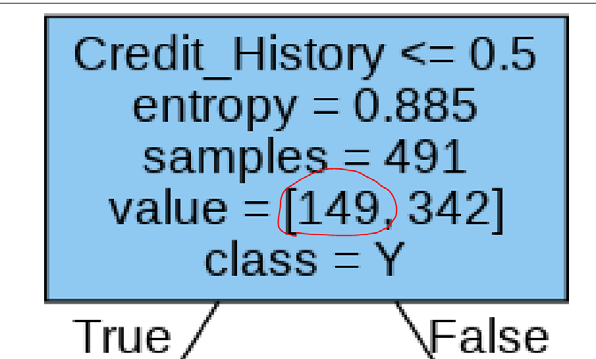

Lets now train our Decision Tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree with one node.

In [49]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.12666645651146669


Tip: array[-1] gives the last element in the array. Clfs[-1] represents the last tree with the last alpha used ccp_alphas[-1]
Lets now plot the alpha vs the number of nodes and depth of tree

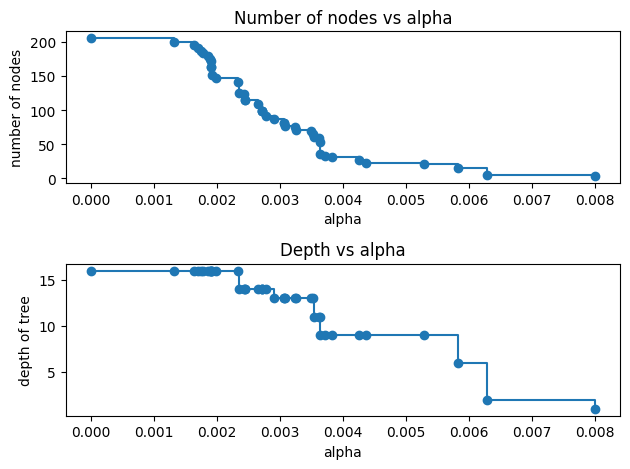

In [51]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

As we can see, the number of nodes and depth of tree decreases as the alpha increases.

Lets now plot the accuracy vs alpha for our training and testing sets:

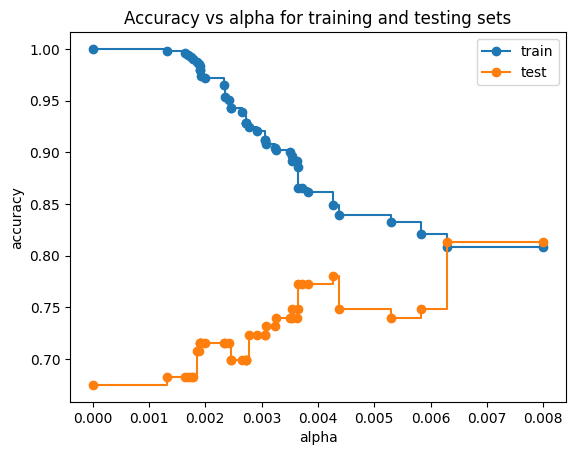

In [52]:
train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

As we can see above, when ccp_alpha is set to 0, we tend to overfit our training set and have a low accuracy on our testing set. As alpha increases, ore of the tree is pruned, and our Decision Tree is generalising better. In our example, an alpha of 0.006 gives us the best accuracy on the testing set.


Lets check the accuracy with our optimised pruned tree:

In [54]:
clf_ = tree.DecisionTreeClassifier(criterion = 'entropy', random_state=0,ccp_alpha=0.006, max_depth=1, min_samples_split=2)
clf_.fit(X_train,Y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

Train score 0.875
Train Confusion matrix


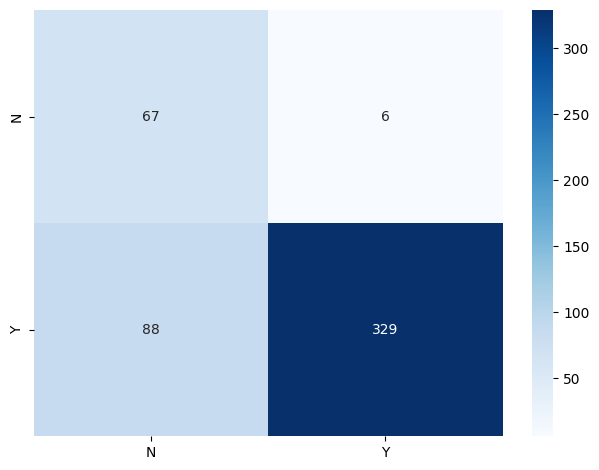

Test score 0.8808290155440415
Test Confusion matrix


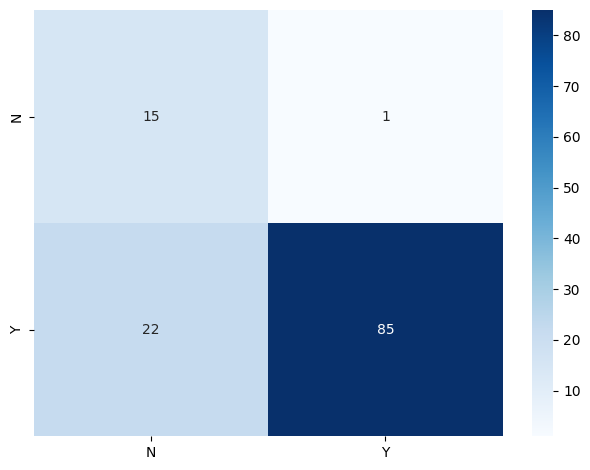

In [55]:
print(f'Train score {f1_score(y_train_pred,Y_train)}')
plot_confusionmatrix(y_train_pred, Y_train, dom='Train')

print(f'Test score {f1_score(y_test_pred,Y_test)}')
plot_confusionmatrix(y_test_pred, Y_test, dom='Test')

When compared to our default Decision Tree, using this cost-complexity technique, we managed to increase our testing accuracy by 5%. Since our tree, is small and our dataset is also not big, we didn’t improve much using alpha, after we optimised our depth and node parameters in the previous step.

We can also visualise our best tree using graphviz (similar code as above).

##Further notes
For larger datasets, we tend to choose Random Forests over Decision Tree due to the fact that it can generalise better. However, for this we are assuming that Interpretability is not a major concern.

Decision Trees are easier to chart, and interpret as shown in the example above. As Random Forests have multiple Decision Trees, it becomes much more difficult to interpret. However, work is being done for us to understand better data science models.